<a href="https://colab.research.google.com/github/jhonDataScience/SkillsBills-IBM/blob/main/Proyecto%20Final%20hecho%20en%20Google%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/creditcard.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
print("df - Filas:", df.shape[0], "Columnas:", df.shape[1])

df - Filas: 284807 Columnas: 31


In [7]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.duplicated().sum()

1081

<Axes: >

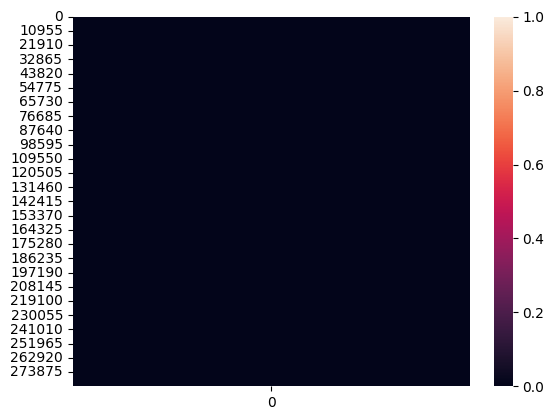

In [11]:
sns.heatmap(df.duplicated().values.reshape(df.shape[0], 1))

# ***El impacto de los duplicados podria ser muy poco, por eso he tomado la decision de no borrarlos y continuar con ellos, asi se mantendra el patron de esa operacion, pues es posible que sea ella la mas usual de los estafadores.***

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?

In [13]:
## Analizamos datos
# Calcula el porcentaje de transacciones fraudulentas
num_fraudulentas = df['Class'].sum()
total_operaciones = df['Class'].count()
porcentaje_operaciones_fraudulentas = (num_fraudulentas / total_operaciones) * 100

# Muestra el porcentaje de transacciones fraudulentas
print(f'Número de operaciones fraudulentas: {num_fraudulentas}')
print(f'Total de operaciones: {total_operaciones}')
print(f'Porcentaje de operaciones fraudulentas: {porcentaje_operaciones_fraudulentas:.2f}%')

Número de operaciones fraudulentas: 492
Total de operaciones: 284807
Porcentaje de operaciones fraudulentas: 0.17%


In [14]:
# Vamos a ver la proporcion de los datos fraudulentos y los no Fraudulentos de otra manera mas simplificada
print('No Fraudulenta', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% de el dataset')
print('Fraudulenta', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% de el dataset')

No Fraudulenta 99.83 % de el dataset
Fraudulenta 0.17 % de el dataset


Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?

In [15]:
# Calcula el importe medio de las transacciones fraudulentas
operaciones_fraudulentas = df[df['Class'] == 1]
importe_medio_fraudulentas = operaciones_fraudulentas['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f'Importe medio de operaciones fraudulentas: {importe_medio_fraudulentas:.2f}')

Importe medio de operaciones fraudulentas: 122.21


***Operaciones don los Datos***
Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

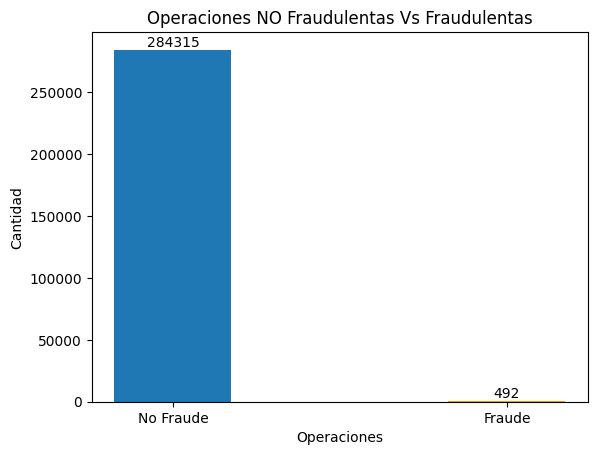

- Transacciones fraudulentas: 492
- Transacciones No fraudulentas: 284315


In [16]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
x_1 = np.count_nonzero(df['Class'] == 1)
y_1 = len(df) - x_1

# Muestra la distribución de las transacciones fraudulentas con respecto de las no fraudulentas
etiquetas = ['No Fraude', 'Fraude']
alturas = [y_1, x_1]
plt.bar(etiquetas, alturas, color=['tab:blue', 'orange'], width=0.35)
plt.xlabel('Operaciones')
plt.ylabel('Cantidad')
plt.title('Operaciones NO Fraudulentas Vs Fraudulentas')

for i, altura in enumerate(alturas):
    plt.text(i, altura + 100, str(altura), ha='center', va='bottom', fontsize=10)

plt.show()
print(f'- Transacciones fraudulentas: {x_1}')
print(f'- Transacciones No fraudulentas: {y_1}')

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)

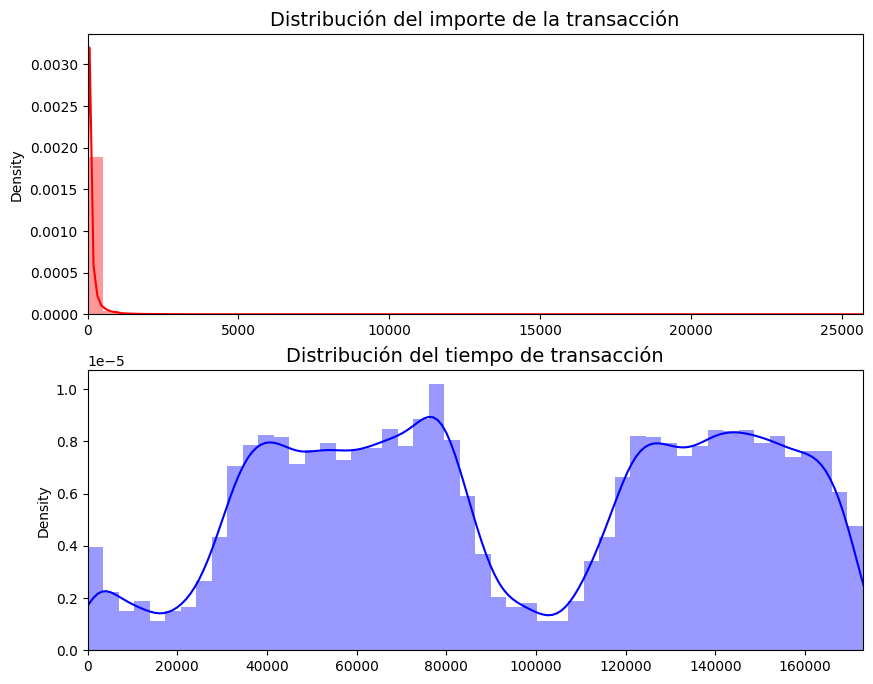

In [17]:
# Separa los datos de transacciones fraudulentas
fig, ax = plt.subplots(2, 1, figsize=(10,8))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribución del importe de la transacción', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribución del tiempo de transacción', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.show()

Otra forma de mostrar esta respuesta puede ser incluyendo el valos de la media en un grafico de barras

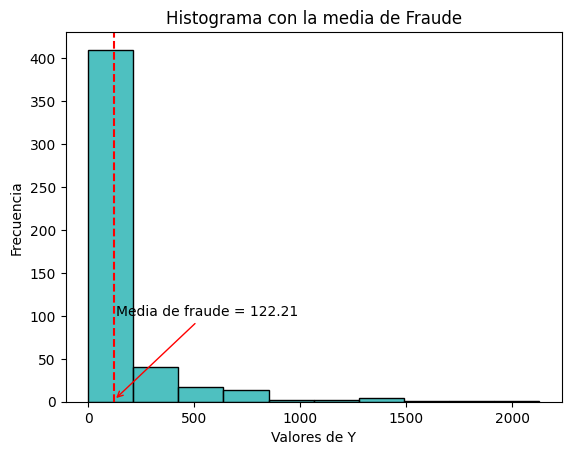

In [18]:
sns.histplot(operaciones_fraudulentas['Amount'], bins=10, kde=False, color='#13ABAB')
media_y = operaciones_fraudulentas['Amount'].mean()
plt.axvline(x=media_y, color='red', linestyle='--', label=f'Media = {media_y:.2f}')

plt.xlabel('Valores de Y')
plt.ylabel('Frecuencia')
plt.title('Histograma con la media de Fraude')
plt.annotate(f'Media de fraude = {media_y:.2f}', xy=(media_y, 2), xytext=(media_y + 10, 100),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

plt.show()

# 📌**Desarrollo y evaluación de modelos**

In [19]:
# Separa los datos de entrenamiento y evaluación
y = df["Class"]
x = df.drop("Class", axis=1)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# 📌**Crea y evalúa los modelos**

In [20]:
# Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import collections

In [21]:
random_forest = RandomForestClassifier(max_depth=150, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [22]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

x_pred = random_forest.predict(x_test)
labels = ['No Fraudulentas', 'Fraudulentas']
print(classification_report(y_test,x_pred, target_names=labels))

                 precision    recall  f1-score   support

No Fraudulentas       1.00      1.00      1.00     56847
   Fraudulentas       0.97      0.83      0.90       115

       accuracy                           1.00     56962
      macro avg       0.98      0.92      0.95     56962
   weighted avg       1.00      1.00      1.00     56962



In [23]:
exactitud = accuracy_score(y_test, x_pred)
exactitud_porcentaje = exactitud * 100
print(f"Exactitud del modelo: {exactitud_porcentaje:.2f}%")

Exactitud del modelo: 99.96%


In [24]:
def calcular_metricas(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1sc = f1_score(y_true, y_pred)
    acsc = accuracy_score(y_true, y_pred)

    return recall * 100, precision * 100, f1sc * 100, acsc * 100

# Llamada a la función
p1, p2, p3, p4 = calcular_metricas(y_test, x_pred)

print('---' * 45)
print('Otras mediciones del modelo en porcentajes: \n')
print(f'Puntuación de recuperación: {p1:.2f}%'.format(recall_score(y_test, x_pred)))
print(f'Puntuación de precisión: {p2:.2f}%'.format(precision_score(y_test, x_pred)))
print(f'F1 Puntuación: {p3:.2f}%'.format(f1_score(y_test, x_pred)))
print(f'Puntuación de precisión: {p4:.2f}%'.format(accuracy_score(y_test, x_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Otras mediciones del modelo en porcentajes: 

Puntuación de recuperación: 83.48%
Puntuación de precisión: 96.97%
F1 Puntuación: 89.72%
Puntuación de precisión: 99.96%
---------------------------------------------------------------------------------------------------------------------------------------


### **Lugo González Jonathan José**